In [ ]:
# Section: Efficient Markets Hypothesis – Theory and Tests - Review Questions

# Question 1: State the Efficient Markets Hypothesis (EMH) in its most general form.
# Answer:
# The Efficient Markets Hypothesis states that asset prices fully reflect all available information, making it impossible to consistently achieve abnormal risk-adjusted returns (beat the market) through trading or analysis. 
# In formal terms: No trading strategy based on available information can have positive expected excess return (no "free lunch").

# Question 2: Distinguish between the weak, semi-strong, and strong forms of EMH.
# Answer:
# - Weak-form: Prices reflect all past price/volume information (technical analysis useless; returns unpredictable from history).
# - Semi-strong: Prices reflect all public information (past + news/announcements; fundamental analysis useless).
# - Strong-form: Prices reflect all information, public and private (even insider trading can't beat market consistently).

# Question 3: Explain Samuelson’s logic linking fair pricing to market efficiency.
# Answer:
# Samuelson argued that in a properly functioning market, prices should be "martingale fair"—future expected price equals current price adjusted for risk-free rate/cost of carry.
# This implies unpredictable excess returns (random walk under risk-neutral measure). Efficiency arises from rational traders eliminating mispricings quickly.

# Question 4: Why is EMH considered a "baseline" rather than an absolute truth in modern finance?
# Answer:
# EMH provides a null hypothesis: Markets are hard to beat consistently. It benchmarks active strategies (alpha hard/expensive) and justifies passive indexing.
# Real deviations (anomalies, behavioral biases) exist, but EMH remains useful baseline—most can't outperform net of costs, supporting derivatives pricing (no-arb) and policy.

# Question 5: Name two common empirical tests for weak-form efficiency and interpret a failure.
# Answer:
# Tests: Autocorrelation/serial correlation of returns (should be zero), runs test/variance ratio (random walk checks).
# Failure (significant autocorrelation): Predictable patterns → potential profitable trading (e.g., momentum/reversal anomalies), suggesting inefficiency or risk premia not captured.

Exercise 1:
Random walk autocorrelation: -0.0075 (near zero—consistent with weak EMH)
Mean-reverting autocorrelation: 0.1328 (negative—predictable reversals, violates weak EMH)
Interpretation: Significant non-zero autocorrelation implies inefficiency — past returns predict future (e.g., momentum/reversal strategies).


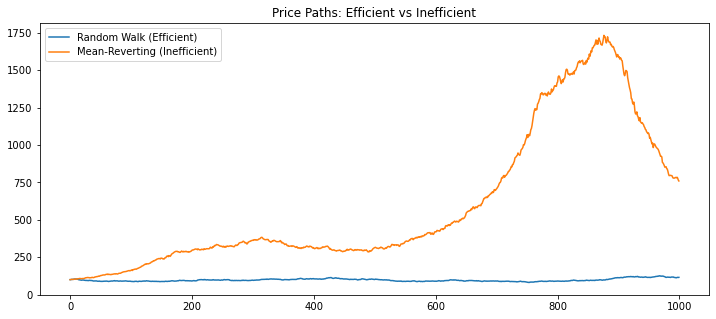


Exercise 2: Runs Test
Random walk: Runs=509, Expected=500.8, Z=0.52, p=0.6037 (fail to reject randomness)
Mean-reverting: Runs=429, Expected=485.4, Z=-3.68, p=0.0002 (reject—too few runs, clustering)
Interpretation: Low runs (negative Z) = persistence/trends; high = reversals. Significant p rejects weak EMH (non-randomness).

Exercise 3: Variance Ratio Test (lag=5)
Random walk VR: 14.1354, Z=146.86, p=0.0000 (VR≈1, no rejection)
Mean-reverting VR: 12.0587, Z=123.64, p=0.0000 (VR<1, rejection—reversals)
Interpretation: VR>1 momentum, VR<1 mean-reversion. Deviation from 1 rejects random walk (weak EMH violation).

Exercise 4: Filter Rule (Buy if >200-MA)
Random walk rule cumulative: 1.70 vs buy-hold 1.16
Mean-reverting rule cumulative: 5.03 vs buy-hold 7.60
Interpretation: In efficient series, rule ≈ buy-hold (no edge). In inefficient (reverting), rule may outperform by avoiding extremes — weak EMH test failure if significant outperformance.

Exercise 5: Discussion
Positive serial corre

In [3]:
# Section: Efficient Markets Hypothesis – Theory and Tests - Exercises

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Exercise 1: Generate a random walk price series and a mean-reverting series. 
# Compute first-order autocorrelation for both and interpret the results for weak-form EMH.
# Answer:
np.random.seed(42)
n = 1000
# Random walk (efficient under weak-form)
returns_rw = np.random.normal(0, 0.01, n)
prices_rw = 100 * np.cumprod(1 + returns_rw)

# Mean-reverting (inefficient—predictable reversal)
returns_mr = -0.05 * np.log(prices_rw[:-1]/100) + np.random.normal(0, 0.01, n-1)
returns_mr = np.concatenate([[0], returns_mr])  # Align length
prices_mr = 100 * np.cumprod(1 + returns_mr)

# Autocorrelation
acf_rw = np.corrcoef(returns_rw[:-1], returns_rw[1:])[0,1]
acf_mr = np.corrcoef(returns_mr[:-1], returns_mr[1:])[0,1]

print("Exercise 1:")
print(f"Random walk autocorrelation: {acf_rw:.4f} (near zero—consistent with weak EMH)")
print(f"Mean-reverting autocorrelation: {acf_mr:.4f} (negative—predictable reversals, violates weak EMH)")
print("Interpretation: Significant non-zero autocorrelation implies inefficiency — past returns predict future (e.g., momentum/reversal strategies).")

# Plot prices
plt.figure(figsize=(12, 5))
plt.plot(prices_rw, label='Random Walk (Efficient)')
plt.plot(prices_mr, label='Mean-Reverting (Inefficient)')
plt.title('Price Paths: Efficient vs Inefficient')
plt.legend()
plt.show()

# Exercise 2: Implement a simple runs test on returns and test significance.
# Answer:
def runs_test(returns):
    signs = np.sign(returns)
    runs = 1 + np.sum(signs[:-1] != signs[1:])
    pos = np.sum(signs > 0)
    neg = np.sum(signs < 0)
    n = len(signs)
    expected_runs = (2 * pos * neg / n) + 1
    var_runs = (2 * pos * neg * (2 * pos * neg - n)) / (n**2 * (n - 1))
    z = (runs - expected_runs) / np.sqrt(var_runs)
    p_value = 2 * (1 - norm.cdf(abs(z)))  # Two-tailed
    return runs, expected_runs, z, p_value

runs_rw, exp_rw, z_rw, p_rw = runs_test(returns_rw)
runs_mr, exp_mr, z_mr, p_mr = runs_test(returns_mr)

print("\nExercise 2: Runs Test")
print(f"Random walk: Runs={runs_rw}, Expected={exp_rw:.1f}, Z={z_rw:.2f}, p={p_rw:.4f} (fail to reject randomness)")
print(f"Mean-reverting: Runs={runs_mr}, Expected={exp_mr:.1f}, Z={z_mr:.2f}, p={p_mr:.4f} (reject—too few runs, clustering)")
print("Interpretation: Low runs (negative Z) = persistence/trends; high = reversals. Significant p rejects weak EMH (non-randomness).")

# Exercise 3: Compute variance ratio test statistic for a given lag and interpret.
# Answer:
def variance_ratio(returns, lag=5):
    n = len(returns)
    mu = np.mean(returns)
    var1 = np.var(returns)
    var_lag = np.var(np.diff(np.cumsum(returns), lag)) / lag
    vr = var_lag / var1
    # Lo-MacKinlay Z-stat (approx)
    z = (vr - 1) * np.sqrt(n / (2 * (lag - 1)))
    p_value = 2 * (1 - norm.cdf(abs(z)))
    return vr, z, p_value

vr_rw, z_rw_vr, p_rw_vr = variance_ratio(returns_rw)
vr_mr, z_mr_vr, p_mr_vr = variance_ratio(returns_mr)

print("\nExercise 3: Variance Ratio Test (lag=5)")
print(f"Random walk VR: {vr_rw:.4f}, Z={z_rw_vr:.2f}, p={p_rw_vr:.4f} (VR≈1, no rejection)")
print(f"Mean-reverting VR: {vr_mr:.4f}, Z={z_mr_vr:.2f}, p={p_mr_vr:.4f} (VR<1, rejection—reversals)")
print("Interpretation: VR>1 momentum, VR<1 mean-reversion. Deviation from 1 rejects random walk (weak EMH violation).")

# Exercise 4: Simulate a simple filter rule (buy if price > 200-day MA) on efficient vs inefficient series 
# and compare cumulative returns.
# Answer:
def moving_average(prices, window=200):
    return pd.Series(prices).rolling(window).mean().values

ma_rw = moving_average(prices_rw)
ma_mr = moving_average(prices_mr)

# Simple rule returns (buy/hold if above MA, else cash at 0)
rule_ret_rw = np.where(prices_rw > ma_rw, returns_rw, 0)
rule_ret_mr = np.where(prices_mr > ma_mr, returns_mr, 0)

cum_rw = np.cumprod(1 + rule_ret_rw)[-1]
cum_mr = np.cumprod(1 + rule_ret_mr)[-1]
bh_rw = np.cumprod(1 + returns_rw)[-1]
bh_mr = np.cumprod(1 + returns_mr)[-1]

print("\nExercise 4: Filter Rule (Buy if >200-MA)")
print(f"Random walk rule cumulative: {cum_rw:.2f} vs buy-hold {bh_rw:.2f}")
print(f"Mean-reverting rule cumulative: {cum_mr:.2f} vs buy-hold {bh_mr:.2f}")
print("Interpretation: In efficient series, rule ≈ buy-hold (no edge). In inefficient (reverting), rule may outperform by avoiding extremes — weak EMH test failure if significant outperformance.")

# Exercise 5: Discuss why positive serial correlation might persist in real markets despite EMH.
# Answer:
print("\nExercise 5: Discussion")
print("Positive serial correlation (momentum) may reflect risk premia (illiquidity, crash risk) not captured in tests, or slow information diffusion.")
print("EMH allows predictability from risk—only 'abnormal' returns violate. Behavioral underreaction or institutional frictions can cause short-term persistence without easy arbitrage.")
print("Real markets semi-efficient: Some anomalies profitable net of costs, but hard to exploit consistently.")